# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(43)

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

$\textbf{Решение: }$
$$$$
Найдем гессиан функции $f(x): df = \langle\frac{1}{2}(A + A^T)x - b, dx\rangle,\; d^2f = \langle\frac{1}{2}(A + A^T)dx_1, dx\rangle \Rightarrow \nabla^2f = \frac{1}{2}(A + A^T)$, тогда задача будет выпуклой при условии $A + A^T \succcurlyeq 0$, остальные выполнены всегда. $\\$
По критерию сильной выпуклости, она имеет место при $\frac{1}{2}(A + A^T) \succcurlyeq \mu E$, остальные условия также выполнены всегда ввиду отсутствия ограничений.


__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

$\textbf{Решение: }$
$$$$
Определение липшицевости с коэффициентом $L$: $$\forall x_0, x_1\in R^d \hookrightarrow ||\nabla f(x_0) - \nabla f(x_1)||\leq L||x_0 - x_1||$$ 
В нашем случае: $$||\nabla f(x_0) - \nabla f(x_1)|| = ||\frac{1}{2}(A + A^T)x_0 - \frac{1}{2}(A + A^T)x_1|| \leq ||\frac{1}{2}(A + A^T)||\cdot||x_0 - x_1||\Rightarrow L = ||\frac{1}{2}(A + A^T)||$$
Сильная выпуклость имеет место при условии: $$\frac{1}{2}(A + A^T) \succcurlyeq \mu E$$
Тогда $$\lambda_{min}(\frac{1}{2}(A + A^T) - \mu E) \geq 0$$
Значит $$\mu = \lambda_{min}(\frac{1}{2}(A + A^T))$$

## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

__(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

$\textbf{Решение: }$
$$$$
Пусть мы работаем с симметричной матрицей A, тогда во второй норме оценки $L$ и $\mu$ можно упростить: $$L = \lambda_{max}(A)$$ $$\mu = \lambda_{min}(A)$$ Ясно, что в таком случае проще всего взять $A = diag(L, ... , L,\,\mu, ... , \mu) $, где $L$ берем $n$ раз, а $\mu$ берем $d - n$ раз, $1\leq n < d$. $ \\ $
Пусть для определенности $n = \frac{d}{2} + 1$.

In [8]:
def generator(d, mu, L):
    D = np.diag(np.repeat([L, mu], [d / 2 + 1, d / 2 - 1]))
    Sample = (L - mu) * np.random.rand(d, d) + mu
    Q, _ = np.linalg.qr(Sample)
    A = Q.T @ D @ Q
    return A

# Правка !


Поправил генерацию матрицы пользуясь спектральным разложением, теперь это какая-то действительно произвольная невыжденная матрица с собственными значениями $L \text{ и } \mu$. Как и ожидалось: в решении задач и выводах ничего не меняется, тк все рассуждения были справедливы для прозвольной матрицы с $\lambda_{max} = L \text{ и } \lambda_{min} = \mu$.

__(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

$\textbf{Решение: }$
$$$$
Обозначим для краткости критерий $\| x_k - x^*\|$ буквой a, критерий $\|f(x_k) - f(x^*)\|$ буквой b. $ \\ $ Далее представлены функции, реализующие вычисление целевой функции, её градиента и градиентного спуска соответственно.

In [9]:
def f(x):
    return 1/2 * x.T @ A @ x - b.T @ x

In [10]:
def grad_f(x):
    return A @ x - b

In [5]:
def GD(f, grad_f, x_0, gamma, exact_sol, kriteria, eps, num_iter):
    error = np.array([])
    x_cur = x_0
    for i in range(num_iter):
        
        x_new = x_cur - gamma * grad_f(x_cur)
        
        if kriteria == 'a':
            cur_err = np.linalg.norm(x_new - exact_sol, ord = 2)
        elif kriteria == 'b':
            cur_err = np.abs(f(x_new) - f(exact_sol))
        
        error = np.append(error, cur_err)
        
        if cur_err > eps:
            i_approx = i
        
        x_cur = x_new
    
    return x_new, error, i_approx + 1

__(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [6]:
#Входные данные
d = 10
mu = 1
L = 100
x_0 = np.zeros(10)
gamma = 1 / L
kriteria = 'a'
eps = 10**(-6)
num_iter = 10**4

In [7]:
A = generator(d, mu, L)
b = 200 * np.random.sample(10) - 110
print('Матрица А: \n', A)
print('Столбец b: \n', b)

Матрица А: 
 [[ 61.24651722  -7.55443297  27.81559391   6.16268635  25.78353216
   17.02018371  15.49182295 -14.96688322   6.76969336   1.3026275 ]
 [ -7.55443297  79.31190271   7.04200456  28.4851523   15.75752673
   -7.51428455 -11.30166321   8.167852    -9.89487863  10.24436107]
 [ 27.81559391   7.04200456  45.86412555  -7.77936419  -0.21035788
   -8.32715031  24.73460412  13.42207496 -18.84607597  18.12263968]
 [  6.16268635  28.4851523   -7.77936419  56.97808224 -13.51037492
    9.11895043  18.99637823  -3.54013812  27.33844934 -10.57885039]
 [ 25.78353216  15.75752673  -0.21035788 -13.51037492  57.64913939
   -1.11703884 -21.93429317 -13.80641903 -10.54765991 -22.78692206]
 [ 17.02018371  -7.51428455  -8.32715031   9.11895043  -1.11703884
   82.0893491  -17.85140534  23.33678062   6.46395373   6.88525467]
 [ 15.49182295 -11.30166321  24.73460412  18.99637823 -21.93429317
  -17.85140534  47.86225316  10.41861895   3.93944086 -13.38104595]
 [-14.96688322   8.167852    13.42207496  

In [8]:
exact_sol = np.linalg.solve(A, b) 
f_exact = f(exact_sol)

x_GD, error , i_approx  = GD(f, grad_f, x_0, gamma , exact_sol, kriteria, eps, num_iter)
f_GD = f(x_GD)
print('Точное решение: \n', exact_sol, '\n')
print('Значение точного решения: ', f_exact, '\n')
print('Решение, полученное методом градиентного спуска: \n', x_GD, '\n')
print('Значение градиентного спуска: ', f_GD, '\n')
print('Норма разности аргументов: ', np.linalg.norm(exact_sol - x_GD))
print('Модуль разности значений задачи: ', abs(f_GD - f_exact))

Точное решение: 
 [-23.15261525  -1.28350509 -81.8412824   -4.94611588  68.71052894
  19.77614466 110.3321715    1.77429101 -35.28486044  56.74662328] 

Значение точного решения:  -14566.55618411316 

Решение, полученное методом градиентного спуска: 
 [-23.15261525  -1.28350509 -81.8412824   -4.94611588  68.71052894
  19.77614466 110.3321715    1.77429101 -35.28486044  56.74662328] 

Значение градиентного спуска:  -14566.55618411312 

Норма разности аргументов:  9.664473255102394e-13
Модуль разности значений задачи:  4.001776687800884e-11


Как видно из модуля разности значений, наш метод сошелся с хорошей точностью.

__(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

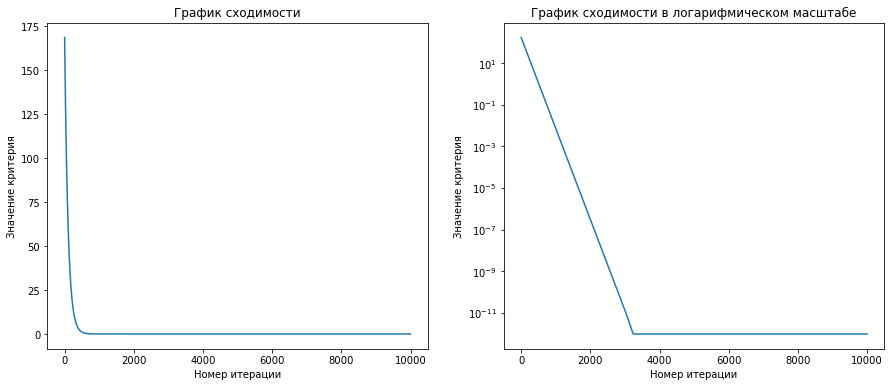

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

x = np.array(range(0, num_iter)) 

axs[0].plot(x, error)
axs[0].set_title("График сходимости")
axs[0].set_xlabel("Номер итерации")
axs[0].set_ylabel("Значение критерия")

axs[1].plot(x, error)
axs[1].set_title("График сходимости в логарифмическом масштабе")
axs[1].set_xlabel("Номер итерации")
axs[1].set_ylabel("Значение критерия")
axs[1].set_yscale("log")

plt.show()

Теперь построим графики для заданной точности на $\|f(x_k) - f(x^*)\|$:

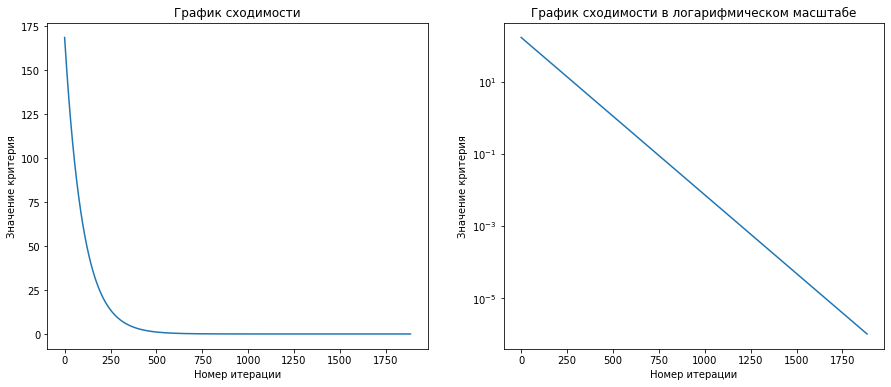

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

x = np.array(range(0, i_approx)) 

axs[0].plot(x, error[0: i_approx])
axs[0].set_title("График сходимости")
axs[0].set_xlabel("Номер итерации")
axs[0].set_ylabel("Значение критерия")

axs[1].plot(x, error[0: i_approx])
axs[1].set_title("График сходимости в логарифмическом масштабе")
axs[1].set_xlabel("Номер итерации")
axs[1].set_ylabel("Значение критерия")
axs[1].set_yscale("log")

plt.show()

Как видно из графиков, метод имеет линейную скорость сходимости.

__(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

По определению метод имеет линейную скорость сходимости, если: $$\|x_k - x^*\|_2 \leq C \cdot q^k, \quad C > 0 \text{ } \text{ и } \text{ } 0 < q < 1 $$ 

На семинаре мы послучили, что для данной задачи имеет место: $$C = \|x_{0} - x^*\|_2 \quad \text{ и } \quad q = (1 - \dfrac{\mu}{L})^{k+1}$$

Посмотрим, что получается:

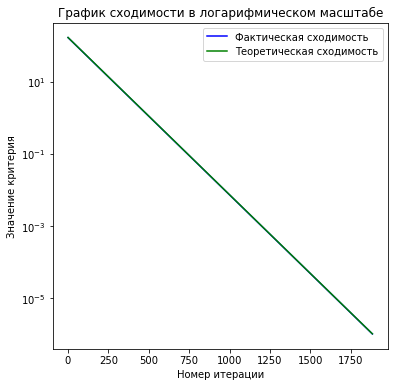

In [11]:
C = np.linalg.norm(x_0 - exact_sol, ord = 2)
q = (1 - mu/L)**(x)

plt.figure(figsize = (6, 6))

plt.plot(x, error[0: i_approx], color = 'blue', label = 'Фактическая сходимость')
plt.plot(x, C * q, color = 'green', label = 'Теоретическая сходимость') 
plt.title("График сходимости в логарифмическом масштабе")
plt.xlabel("Номер итерации")
plt.ylabel("Значение критерия")
plt.yscale("log")
plt.legend()

plt.show()

Как видно, заметить на данном графике разницу между прямыми не получается, это значит, что мы с очень неплохой точностью приблизились к теоретической оценке, посмотрим $~-$ насколько:

In [12]:
print('Разница между теоретической скорость и практической в среднем: ', np.mean(C * q - error[0: i_approx]))
print('Разница на достаточно большой итерации: ', C * q[1500] - error[1500])

Разница между теоретической скорость и практической в среднем:  0.0905488640772416
Разница на достаточно большой итерации:  4.841573471835249e-07


Графики в увеличенном масштабе на различных промежутках:

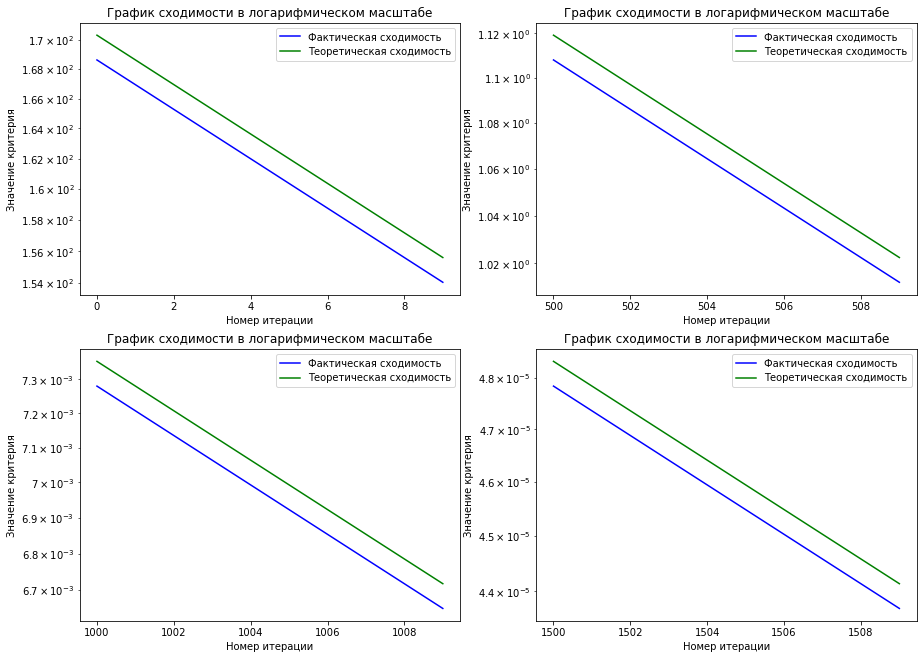

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (15, 11))

axs[0, 0].plot(np.array(range(0, 10)), error[0:10], color = 'blue', label = 'Фактическая сходимость')
axs[0, 0].plot(np.array(range(0, 10)), C * q[0:10], color = 'green', label = 'Теоретическая сходимость')
axs[0, 0].set_title("График сходимости в логарифмическом масштабе")
axs[0, 0].set_xlabel("Номер итерации")
axs[0, 0].set_ylabel("Значение критерия")
axs[0, 0].set_yscale("log")
axs[0, 0].legend()

axs[0, 1].plot(np.array(range(500, 510)), error[500:510], color = 'blue', label = 'Фактическая сходимость')
axs[0, 1].plot(np.array(range(500, 510)), C * q[500:510], color = 'green', label = 'Теоретическая сходимость')
axs[0, 1].set_title("График сходимости в логарифмическом масштабе")
axs[0, 1].set_xlabel("Номер итерации")
axs[0, 1].set_ylabel("Значение критерия")
axs[0, 1].set_yscale("log")
axs[0, 1].legend()

axs[1, 0].plot(np.array(range(1000, 1010)), error[1000:1010], color = 'blue', label = 'Фактическая сходимость')
axs[1, 0].plot(np.array(range(1000, 1010)), C * q[1000:1010], color = 'green', label = 'Теоретическая сходимость')
axs[1, 0].set_title("График сходимости в логарифмическом масштабе")
axs[1, 0].set_xlabel("Номер итерации")
axs[1, 0].set_ylabel("Значение критерия")
axs[1, 0].set_yscale("log")
axs[1, 0].legend()

axs[1, 1].plot(np.array(range(1500, 1510)), error[1500:1510], color = 'blue', label = 'Фактическая сходимость')
axs[1, 1].plot(np.array(range(1500, 1510)), C * q[1500:1510], color = 'green', label = 'Теоретическая сходимость')
axs[1, 1].set_title("График сходимости в логарифмическом масштабе")
axs[1, 1].set_xlabel("Номер итерации")
axs[1, 1].set_ylabel("Значение критерия")
axs[1, 1].set_yscale("log")
axs[1, 1].legend()

plt.show()

Графики расположены достаточно близко друг к другу $\Rightarrow$ теоретическая оценка верна с хорошей тончостью. 

__(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

Посмотрим, при каких значениях гамма метод сходится быстрее всего, при каких расходится(значение $\gamma = \frac{2}{\mu + L}$ взято из теоретических соображений): 

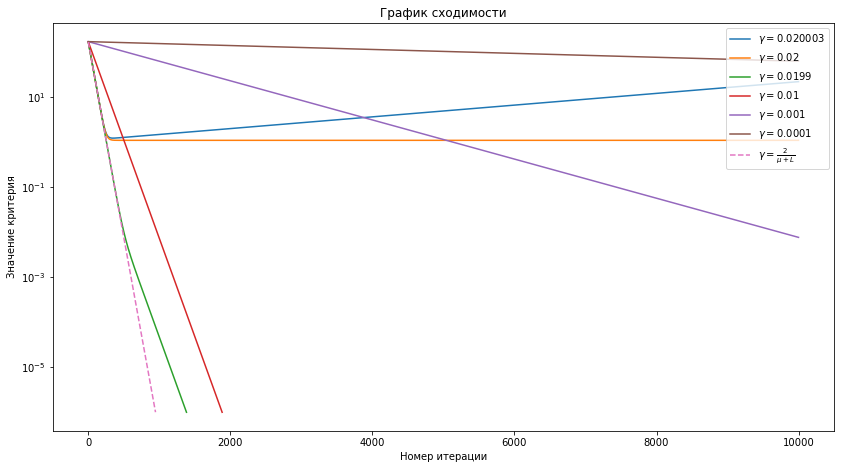

In [14]:
gammas = [0.020003, 0.02, 0.0199, 0.01, 0.001, 10**(-4), 2/(L+mu)]

plt.figure(figsize = (14, 7.5))

plt.title("График сходимости")
plt.xlabel("Номер итерации")
plt.ylabel("Значение критерия")

N_iter = []
for gamma in gammas:
    _ , errors, i_approx = GD(f, grad_f, x_0, gamma, exact_sol, kriteria, eps, num_iter)
    
    x = np.array(range(0, i_approx)) 
    
    if gamma == gammas[-1]:
        plt.plot(x, errors[0: i_approx], '--', label = r"$\gamma = \frac{2}{\mu + L}$")
    else:
        plt.plot(x, errors[0: i_approx], label = '$\gamma = $' + str(gamma))
        
    N_iter.append(i_approx)
    
plt.legend(loc = 'upper right')
plt.yscale("log")
plt.show()

Как видно по графикам, метод перестает сходиться при $\gamma \geq 0.02 = \frac{2}{L}$: еще при $\gamma = 0.0199$ сходимость есть, при $\gamma = 0.020003$ расходимость уже очевидна. Если выбирать слишком маленькие $\gamma$, как например $\gamma = 10^{-4}$, то метод сходится, но за больше чем $10^4$ итераций. 

Посмотрим на количество итераций: 

In [15]:
print("Число итераций до сходимости до заданной точности для gamma = 0.0199: ", N_iter[2])
print("Число итераций до сходимости до заданной точности для gamma = 0.01: ", N_iter[3])
print("Число итераций до сходимости до заданной точности для gamma = 0.001 и gamma = 0.0001: >", N_iter[4])
print("Число итераций до сходимости до заданной точности для gamma = 2 / (mu + L): ", N_iter[6])

Число итераций до сходимости до заданной точности для gamma = 0.0199:  1383
Число итераций до сходимости до заданной точности для gamma = 0.01:  1885
Число итераций до сходимости до заданной точности для gamma = 0.001 и gamma = 0.0001: > 10000
Число итераций до сходимости до заданной точности для gamma = 2 / (mu + L):  947


Как видно, самый лучший вариант получается при $\gamma = \frac{2}{\mu + L}$ как и должно быть.

__(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

In [16]:
#Входные данные

d = 10
mu = 0
L = 1000
x_0 = np.zeros(10)
gamma = 1 / L
kriteria = 'a'
eps = 10**(-4)
num_iter = 10**5

#Генерация системы

A = generator(d, mu, L)
b = 200 * np.random.sample(10) - 110

In [17]:
#Решение методом градиентного спуска

x_GD, error , i_approx  = GD(f, grad_f, x_0, gamma , exact_sol, kriteria, eps, num_iter)
f_GD = f(x_GD)

print('Решение, полученное методом градиентного спуска: \n', x_GD, '\n')
print('Значение градиентного спуска: ', f_GD, '\n')
print('Число итераций: ', i_approx)

Решение, полученное методом градиентного спуска: 
 [ 3805.87626923 -3609.26109372 -9855.21378807 -4809.35824809
    18.19013648 -3523.41795342  -911.27419481 -2208.89552162
  -203.99013517 -2838.18315255] 

Значение градиентного спуска:  -1739887.7229909285 

Число итераций:  100000


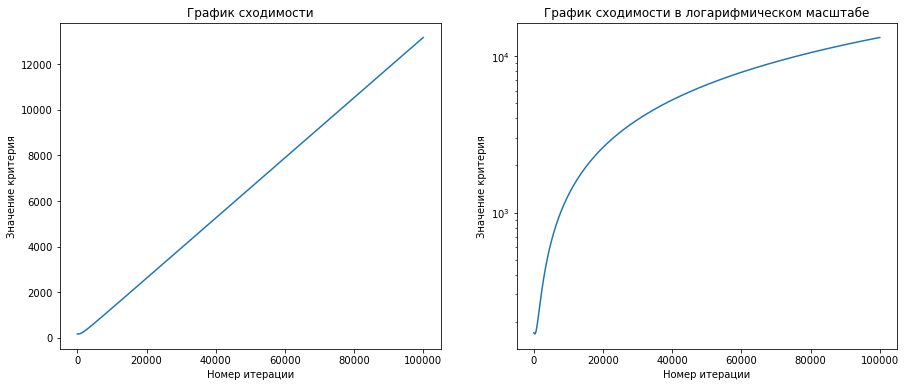

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

x = np.array(range(0, num_iter)) 

axs[0].plot(x, error)
axs[0].set_title("График сходимости")
axs[0].set_xlabel("Номер итерации")
axs[0].set_ylabel("Значение критерия")

axs[1].plot(x, error)
axs[1].set_title("График сходимости в логарифмическом масштабе")
axs[1].set_xlabel("Номер итерации")
axs[1].set_ylabel("Значение критерия")
axs[1].set_yscale("log")

plt.show()

Как видно из графиков, наш метод существенно расходится, это несложно объяснить: матрица получается вырожденная, решений у системы $Ax = b$ бесконечно много, поэтому градиентый спуск просто прыгает между решениями и никуда не приходит.

__(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

In [19]:
#Меняем критерий 
kriteria = 'b'

In [20]:
#Меняем гиперпараметры
d = 10
mu = 1
L = 100
x_0 = np.zeros(10)
gamma = 1 / L
eps = 10**(-6)
num_iter = 10**4

In [21]:
#Генерируем матрицу и столбец b
A = generator(d, mu, L)
b = 200 * np.random.sample(10) - 110

In [22]:
#Точное решение
exact_sol = np.linalg.solve(A, b) 
f_exact = f(exact_sol)

#Решение градиентным спуском 
x_GD, error , i_approx  = GD(f, grad_f, x_0, gamma , exact_sol, kriteria, eps, num_iter)
f_GD = f(x_GD)

print('Точное решение: \n', exact_sol, '\n')
print('Значение точного решения: ', f_exact, '\n')
print('Решение, полученное методом градиентного спуска: \n', x_GD, '\n')
print('Значение градиентного спуска: ', f_GD, '\n')
print('Норма разности аргументов: ', np.linalg.norm(exact_sol - x_GD))
print('Модуль разности значений задачи: ', abs(f_GD - f_exact))

Точное решение: 
 [-12.15698979 -32.6574535   47.75622413  45.37039202 -26.54076453
 -37.71159253  -1.24044104  36.95245253  -9.64913365  46.94302092] 

Значение точного решения:  -5784.29566663102 

Решение, полученное методом градиентного спуска: 
 [-12.15698979 -32.6574535   47.75622413  45.37039202 -26.54076453
 -37.71159253  -1.24044104  36.95245253  -9.64913365  46.94302092] 

Значение градиентного спуска:  -5784.295666630986 

Норма разности аргументов:  6.193839827991787e-13
Модуль разности значений задачи:  3.456079866737127e-11


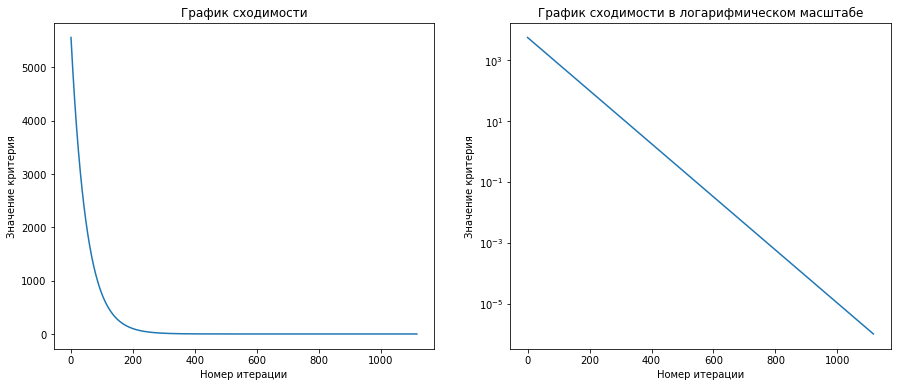

In [23]:
#Отрисовываем сходимость
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

x = np.array(range(0, i_approx)) 

axs[0].plot(x, error[0: i_approx])
axs[0].set_title("График сходимости")
axs[0].set_xlabel("Номер итерации")
axs[0].set_ylabel("Значение критерия")

axs[1].plot(x, error[0: i_approx])
axs[1].set_title("График сходимости в логарифмическом масштабе")
axs[1].set_xlabel("Номер итерации")
axs[1].set_ylabel("Значение критерия")
axs[1].set_yscale("log")

plt.show()

Как видно, сходимость присутствует.

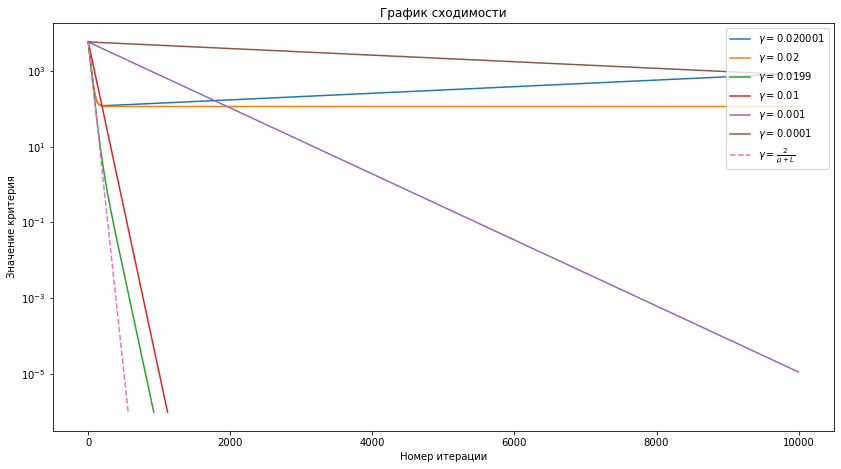

In [24]:
#Для разных gamma смотрим скорость сходимости
gammas = [0.020001, 0.02, 0.0199, 0.01, 0.001, 10**(-4), 2/(L+mu)]

plt.figure(figsize = (14, 7.5))

plt.title("График сходимости")
plt.xlabel("Номер итерации")
plt.ylabel("Значение критерия")

N_iter = []
for gamma in gammas:
    _ , errors, i_approx = GD(f, grad_f, x_0, gamma, exact_sol, kriteria, eps, num_iter)
    
    x = np.array(range(0, i_approx)) 
    
    if gamma == gammas[-1]:
        plt.plot(x, errors[0: i_approx], '--', label = r"$\gamma = \frac{2}{\mu + L}$")
    else:
        plt.plot(x, errors[0: i_approx], label = '$\gamma = $' + str(gamma))
        
    N_iter.append(i_approx)
    
plt.legend(loc = 'upper right')
plt.yscale("log")
plt.show()

In [25]:
print("Число итераций до сходимости до заданной точности для gamma = 0.0199: ", N_iter[2])
print("Число итераций до сходимости до заданной точности для gamma = 0.01: ", N_iter[3])
print("Число итераций до сходимости до заданной точности для gamma = 0.001 и gamma = 0.0001: >"+ str(N_iter[4]))
print("Число итераций до сходимости до заданной точности для gamma = 2 / (mu + L): ", N_iter[6])

Число итераций до сходимости до заданной точности для gamma = 0.0199:  922
Число итераций до сходимости до заданной точности для gamma = 0.01:  1117
Число итераций до сходимости до заданной точности для gamma = 0.001 и gamma = 0.0001: >10000
Число итераций до сходимости до заданной точности для gamma = 2 / (mu + L):  561


Как видно с другим критерием ситуация концептуально не меняется: метод сходится для $\gamma < 0.02$, лучшее решение при $\gamma = \frac{2}{\mu + L}$, однако видно, что для достижения заданной точности в этом случае потребовалось значительно меньше итераций.

__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

Значение просто выпуклой задачи $+\infty$, поэтому рассматривать ее нет особого смысла.

Выпишем виды шагов:

Уменьшающийся шаг: $\gamma_k = \dfrac{c}{k}$.

Наискорейший спуск: $\gamma_k = \dfrac{\frac{1}{2}\left<\nabla f(x_k), Ax_k\right> + \frac{1}{2}\left<x_k, A\nabla f(x_k)\right> - \left<\nabla f(x_k), b\right>}{2 \cdot \left<\nabla f(x_k), A\nabla f(x_k)\right>}$.

Правило Армихо: $\gamma_k: f(x_k - \gamma_k \nabla f(x_k)) \leq f(x_k) - c\cdot \gamma_k \cdot \nabla f(x_k)^T \nabla f(x_k)$.

Правило Вульфа: $$\gamma_k: f(x_k - \gamma_k \nabla f(x_k)) \leq f(x_k) - c_1 \cdot \gamma_k \cdot \nabla f(x_k)^T \nabla f(x_k)$$

$$\;\;\;\;\;\left|\nabla f(x_k - \gamma_k \nabla f(x_k))^T \nabla f(x_k) \right| \leq c_2\cdot \nabla f(x_k)^T \nabla f(x_k)$$

Правило Гольдштейна: $\gamma_k: f(x_k) - (1-c)\gamma_k\nabla f(x_k)^T \nabla f(x_k) \leq f(x_k - \gamma_k \nabla f(x_k)) \leq f(x_k) - c \gamma_k \nabla f(x_k)^T\nabla f(x_k)$

Шаг Поляка-Шора: $\gamma_k =  \dfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$.

In [11]:
import time
from tqdm import trange
import sys

Реализации шагов:

In [84]:
def gamma_decr(c, k, x):
    return c / (k + 1)

def FGM(c, k, x):
    return (grad_f(x).T @ grad_f(x)) / (grad_f(x).T @ A @ grad_f(x))

def gamma_armijo(c, k, x):
    gamma = 1.
    eta = 0.95
    while f(x - gamma * grad_f(x)) > (f(x) - c * gamma * (grad_f(x).T @ grad_f(x))):
        gamma *= eta
    
    return gamma

def gamma_wolfe(c, k, x):
    gamma = 1.
    eta = 0.9
    i = 0
    while (f(x - gamma * grad_f(x)) > f(x) - c * gamma * (grad_f(x) @ grad_f(x))) or \
    (np.abs(grad_f(x - gamma * grad_f(x)).T @ grad_f(x)) > const * \
     np.abs(grad_f(x).T @ grad_f(x))):
        gamma *= eta
        i += 1
        if i > 1000:
            break
    
    return gamma

def gamma_goldstein(c, k, x):
    gamma = 1.
    eta = 0.9
    while (f(x) - (1 - c) * gamma * grad_f(x).T @ grad_f(x) > f(x - gamma * grad_f(x))) or \
           (f(x - gamma * grad_f(x)) > f(x) - c * gamma * grad_f(x).T @ grad_f(x)):
        gamma *= eta
    
    return gamma

def PSH(c, k, x):
    return (f(x) - f(x_sol)) / c / np.linalg.norm(grad_f(x))**2

Для уменьшеющегося шага будем брать $c = 0.501, 0.5, 0.4, 0.35$.

Для правила Армихо: $c = 0.1, 0.02, 10^{-3}, 10^{-4}, 10^{-5}$.

Для правила Вульфа: $c = 0.09, 0.01$ и $const = 0.9, 0.1$.

Для правила Гольдштейна: $c = 0.3, 0.2, 0.1, 0.01, 10^{-3}, 10^{-4}$.

Для шага Поляка-Шора: $\alpha = 1, 2, 3, 4$.

In [88]:
def GradientDescent(f, nabla_f, gamma, c, x_sol, max_iter = 10**3, eps = 10**(-8)):
    x = np.random.randn(d)
    times = [0]
    time_now = 0
    error = []
    
    for num_iter in trange(max_iter, file = sys.stdout, ncols = 80, colour = 'cyan'):
        start_time = time.time()
        
        x -= nabla_f(x) * gamma(c, num_iter, x)
        
        err = np.linalg.norm(f(x) - f(x_sol))
        error.append(err)
        
        if err < eps:
            break
        
        end_time = time.time()
        time_now += end_time - start_time
        times.append(time_now)
        
    return x, error, times

In [52]:
#Initial values
d = 10
mu = 1
L = 100
A = generator(d, mu, L)
b = 200 * np.random.sample(10) - 110
c = [[0.501, 0.5, 0.4, 0.35], [0.9, 0.1, 0.02, 10**(-3), 10**(-4), 10**(-5)], [0.09, 0.01], \
    [0.3, 0.2, 0.1, 0.01, 10**(-3), 10**(-4)], [1, 2, 3, 4]]
constants = [0.9, 0.1]
x_sol = np.linalg.inv(A) @ b

In [56]:
constants = [0.9, 0.1]

# Уменьшающийся шаг

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 41599.76it/s]


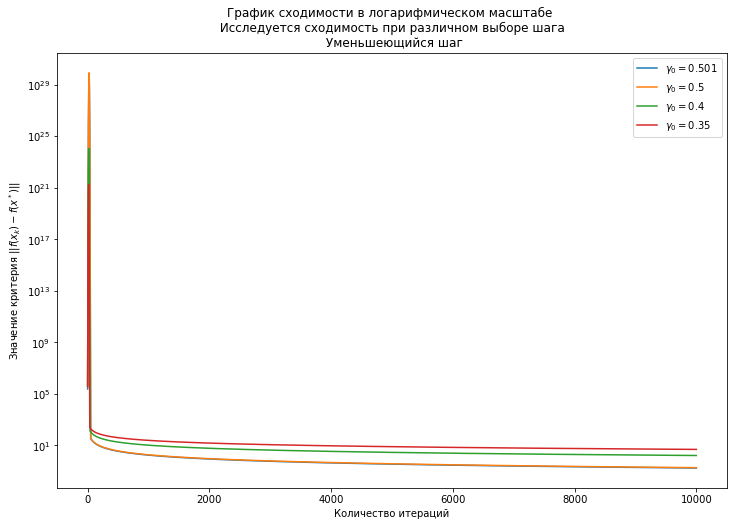

In [89]:
fig = plt.figure(figsize = (12, 8))
for i in c[0]:    
    _, error_decr, _ = GradientDescent(f, grad_f, gamma_decr, i, x_sol, max_iter = 10**4)
    plt.plot(range(len(error_decr)), error_decr, label = r'$\gamma_0 = $' + str(i))
plt.title("График сходимости в логарифмическом масштабе \n Исследуется сходимость при различном выборе шага \n Уменьшеющийся шаг")
plt.xlabel("Количество итераций")
plt.ylabel(r"Значение критерия $||f(x_k) - f(x^*)||$")
plt.yscale("log")
plt.legend()
plt.show()

Лучшее значение получилось $\gamma_k = \frac{1}{2k}$. Для него время работы:

In [41]:
_, _, times = GradientDescent(f, grad_f, gamma_decr, 0.5, x_sol, max_iter = 10**4)
print('Уменьшающийся шаг, время работы: ', times[-1])

100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5849.51it/s]
Уменьшающийся шаг, время работы:  1.6532196998596191


Рассмотрим сначала сильно выпуклый случай:

# Наискорейший спуск

 80%|██████████████████████████████▍       | 801/1000 [00:00<00:00, 2793.92it/s]


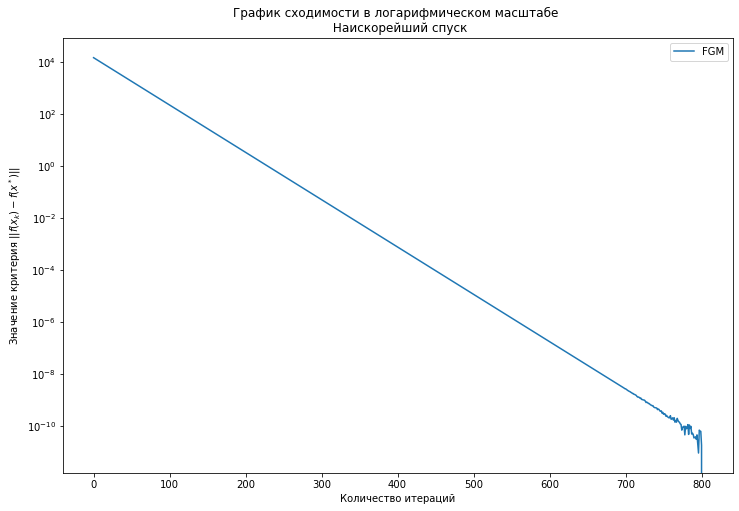

In [45]:
fig = plt.figure(figsize = (12, 8))    
_, error_FGM, time_FGM = GradientDescent(f, grad_f, FGM, i, x_sol, max_iter = 1000, eps = 1e-20)
plt.plot(range(len(error_FGM)), error_FGM, label = 'FGM')
plt.title("График сходимости в логарифмическом масштабе \n Наискорейший спуск")
plt.xlabel("Количество итераций")
plt.ylabel(r"Значение критерия $||f(x_k) - f(x^*)||$")
plt.yscale("log")
plt.legend()
plt.show()

In [46]:
print('Наискореший спуск время работы: ', time_FGM[-1])

Наискореший спуск время работы:  0.278872013092041


# Правило Армихо

100%|███████████████████████████████████████| 1000/1000 [00:10<00:00, 95.53it/s]


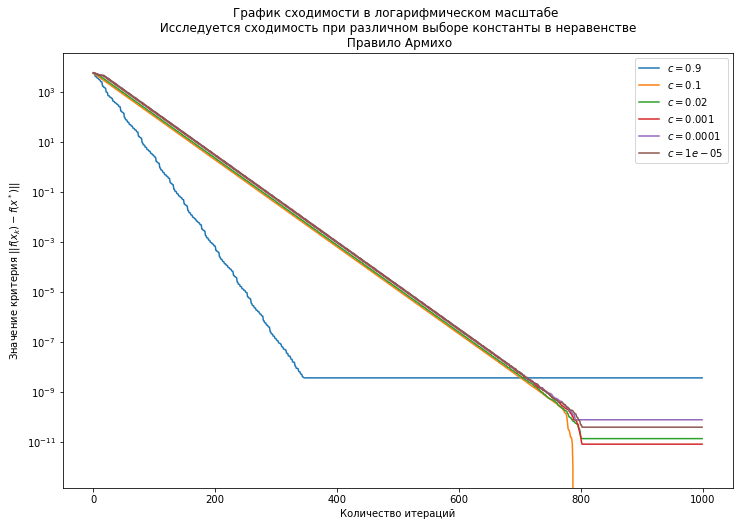

In [53]:
fig = plt.figure(figsize = (12, 8))
for i in c[1]:    
    _, error_armijo, _ = GradientDescent(f, grad_f, gamma_armijo, i, x_sol, max_iter = 10**3, eps = 1e-20)
    plt.plot(range(len(error_armijo)), error_armijo, label = f'$c = {i}$')
plt.title("График сходимости в логарифмическом масштабе \n Исследуется сходимость при различном выборе константы в неравенстве \n Правило Армихо")
plt.xlabel("Количество итераций")
plt.ylabel(r"Значение критерия $||f(x_k) - f(x^*)||$")
plt.yscale("log")
plt.legend()
plt.show()

Лучшая константа: $c = 0.001$.

In [82]:
_, _, times = GradientDescent(f, grad_f, gamma_armijo, 0.1, x_sol, max_iter = 10**3, eps = 1e-12)
print('Правило Армихо, лучшее время: ', times[-1])

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 413.07it/s]
Правило Армихо, лучшее время:  2.4179041385650635


# Правило Вульфа 

100%|████████████████████████████████████████| 800/800 [00:01<00:00, 407.34it/s]


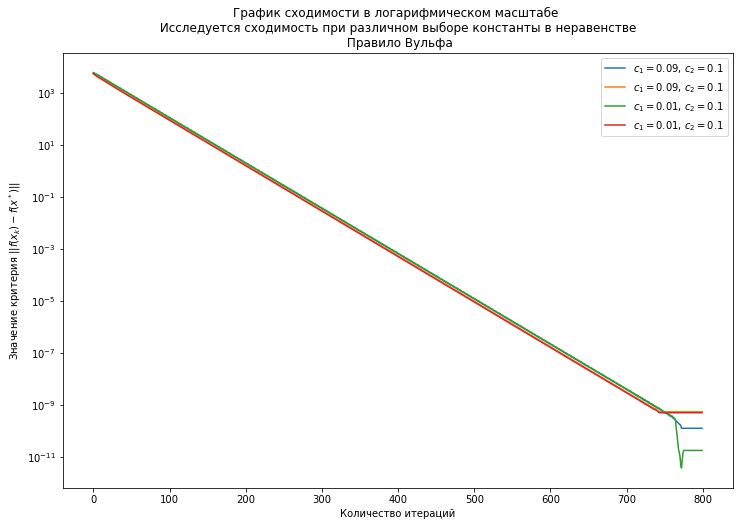

In [74]:
fig = plt.figure(figsize = (12, 8))
for i in c[2]:
    for const in constants:
        _, error_wolfe, _ = GradientDescent(f, grad_f, gamma_wolfe, i, x_sol, max_iter = 800, eps = 1e-12)
        plt.plot(range(len(error_wolfe)), error_wolfe, label = r'$c_1 = $' + f'{i}, ' + r'$c_2 = $' + f'{j}')
plt.title("График сходимости в логарифмическом масштабе \n Исследуется сходимость при различном выборе константы в неравенстве \n Правило Вульфа")
plt.xlabel("Количество итераций")
plt.ylabel(r"Значение критерия $||f(x_k) - f(x^*)||$")
plt.yscale("log")
plt.legend()
plt.show()

Лучшие константы: $c_1 = 0.01$, $c_2 = 0.1$.

In [75]:
const = 0.1
_, _, times = GradientDescent(f, grad_f, gamma_wolfe, 0.01, x_sol, max_iter = 800, eps = 1e-12)
print('Правило Вульфа, лучшее время: ', times[-1])

100%|████████████████████████████████████████| 800/800 [00:01<00:00, 434.28it/s]
Правило Вульфа, лучшее время:  1.8411171436309814


# Правило Гольдштейна

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 398.33it/s]


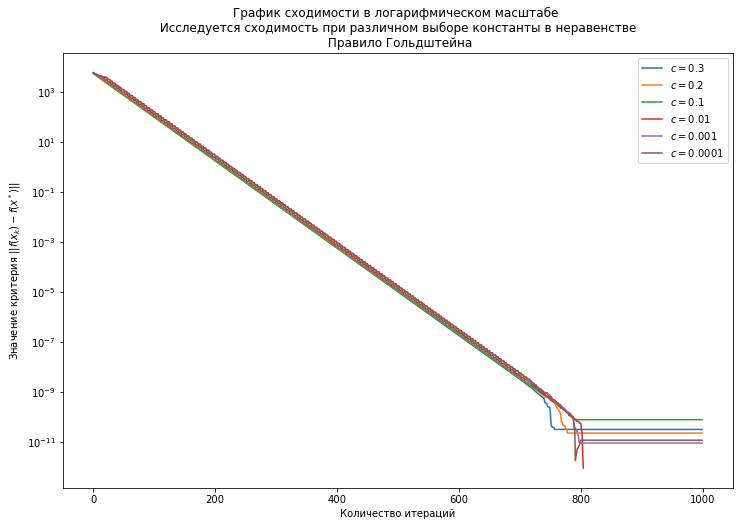

In [79]:
fig = plt.figure(figsize = (12, 8))
for i in c[3]:
    _, error_goldstein, _ = GradientDescent(f, grad_f, gamma_goldstein, i, x_sol, max_iter = 10**3, eps = 1e-12)
    plt.plot(range(len(error_goldstein)), error_goldstein, label = r'$c = $' + f'{i}')
                                            
plt.title("График сходимости в логарифмическом масштабе \n Исследуется сходимость при различном выборе константы в неравенстве \n Правило Гольдштейна")
plt.xlabel("Количество итераций")
plt.ylabel(r"Значение критерия $||f(x_k) - f(x^*)||$")
plt.yscale("log")
plt.legend()
plt.show()

Лучшая константа: $c = 0.01$.

In [81]:
_, _, times = GradientDescent(f, grad_f, gamma_goldstein, 0.01, x_sol, max_iter = 1000, eps = 1e-12)
print('Правило Гольдштейна, лучшее время: ', times[-1])

 81%|███████████████████████████████▋       | 812/1000 [00:01<00:00, 764.43it/s]
Правило Гольдштейна, лучшее время:  1.0562644004821777


# Шаг Поляка-Шора

 87%|████████████████████████████████▏    | 870/1000 [00:00<00:00, 13158.06it/s]


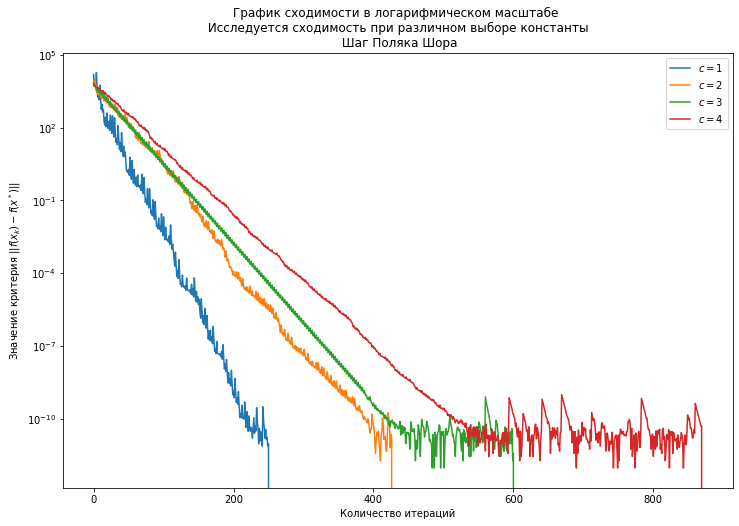

In [86]:
fig = plt.figure(figsize = (12, 8))
for i in c[4]:
    _, error_PSH, _ = GradientDescent(f, grad_f, PSH, i, x_sol, max_iter = 10**3, eps = 1e-20)
    plt.plot(range(len(error_PSH)), error_PSH, label = r'$c = $' + f'{i}')
                                            
plt.title("График сходимости в логарифмическом масштабе \n Исследуется сходимость при различном выборе константы \n Шаг Поляка Шора")
plt.xlabel("Количество итераций")
plt.ylabel(r"Значение критерия $||f(x_k) - f(x^*)||$")
plt.yscale("log")
plt.legend()
plt.show()

Лучшая константа: $\alpha = 1$.

In [87]:
_, _, times = GradientDescent(f, grad_f, PSH, 0.01, x_sol, max_iter = 1000, eps = 1e-20)
print('Правило Гольдштейна, лучшее время: ', times[-1])

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 12678.24it/s]
Правило Гольдштейна, лучшее время:  0.06126070022583008


# Вывод

Как видно из графиков и времен, шаг Поляка Шора безоговорочно лушче всех остальных методов. Все правила после проделанных восьми домашек кажутся смешными: мы обычно бьемся за то, чтобы не считать лишние компоненты градиента, а тут нам надо и функцию несколько раз вычислить, и градиенты в разных точках считать, а потом еще и произведения разных матриц. Хоть немного большая задача делает их совершенно неприменимыми. Наискореший спуск отработал неплохо, но это только в такой задаче, ведь мы аналитически нашли выражение для шага, в общем случае нужно будет решать на каждом шаге еще одну задачу оптимизации. Уменьшающийся шаг отработал плохо при любых константах, но в нем ничего не надо дополнительно считать(все равно Поляк Шор лучше, с учетом разницы в точности и количестве итераций). Однако есть и у шага Поляка-Шора большая загвоздка: надо знать точное решение :)